In [216]:
# Alistair Empey - CIDAF Final Project

In [217]:
# Importing packages
import pandas as pd
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [218]:
os.getcwd()

'/Users/aliempey/Desktop/CIDAF/UCDPA_alistairempey'

In [219]:
# Importing Euro / USD Exchange Rate Dataset (reading from a CSV file)
eurusd = pd.read_csv('/Users/aliempey/Desktop/CIDAF/EURUSD.csv')

In [220]:
# Selecting relevant columns
eurusd = eurusd.iloc[:, [0, 4]]

In [221]:
# Importing Crude Oil Price Dataset (reading from excel file, selecting relevant sheet & rows)
oil = pd.read_excel('https://www.eia.gov/dnav/pet/xls/PET_PRI_SPT_S1_D.xls', sheet_name='Data 1', skiprows=[1, 2])

In [222]:
oil.head()

,Back to Contents,Data 1: Crude Oil,Unnamed: 2
0,1986-01-02,25.56,NaN
1,1986-01-03,26.00,NaN
2,1986-01-06,26.53,NaN
3,1986-01-07,25.85,NaN
4,1986-01-08,25.87,NaN


In [223]:
# Renaming Column Headers
oil.rename(columns = {'Back to Contents':'Date', 'Data 1: Crude Oil':'Close'}, inplace = True)

In [224]:
oil.head()

,Date,Close,Unnamed: 2
0,1986-01-02,25.56,NaN
1,1986-01-03,26.00,NaN
2,1986-01-06,26.53,NaN
3,1986-01-07,25.85,NaN
4,1986-01-08,25.87,NaN


In [225]:
# Filtering for relevant rows
oil=oil.iloc[:,0:2]

In [226]:
oil.head()

,Date,Close
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [227]:
# Creating new column - daily percent change in oil price
oil['% change'] = oil['Close'].pct_change(1)

In [228]:
# Filtering for data in the last year
oil = oil[(oil['Date'] >= '2021-09-10')]
oil.reset_index()
oil.head()

,Date,Close,% change
9132,2021-09-10,69.82,0.022854
9133,2021-09-13,70.54,0.010312
9134,2021-09-14,70.53,-0.000142
9135,2021-09-15,72.59,0.029207
9136,2021-09-16,72.69,0.001378


In [229]:
# Creating new column - daily percentage change of the exchange rate
eurusd['% change'] = eurusd['Close'].pct_change(1)

In [230]:
eurusd.head()

,Date,Close,% change
0,2021-09-10,1.182592,NaN
1,2021-09-13,1.181195,-0.001181
2,2021-09-14,1.181195,0.000000
3,2021-09-15,1.180498,-0.000590
4,2021-09-16,1.182000,0.001272


In [231]:
# CHanging data type to datetime64
eurusd['Date'] = pd.to_datetime(eurusd['Date'])

In [232]:
# Merging datasets, adding suffixes to differentiate columns
df = pd.merge(oil, eurusd, how='outer', on='Date', suffixes=('_oil', '_eur/usd'))

In [233]:
df.head()

,Date,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd
0,2021-09-10,69.82,0.022854,1.182592,NaN
1,2021-09-13,70.54,0.010312,1.181195,-0.001181
2,2021-09-14,70.53,-0.000142,1.181195,0.000000
3,2021-09-15,72.59,0.029207,1.180498,-0.000590
4,2021-09-16,72.69,0.001378,1.182000,0.001272


In [234]:
# Setting the index to the df datetime
df = df.set_index('Date')

In [235]:
# Filling in missing dates in df
df = df.resample('D').mean()

In [236]:
df

,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd
Date,,,,
2021-09-10,69.82,0.022854,1.182592,NaN
2021-09-11,NaN,NaN,NaN,NaN
2021-09-12,NaN,NaN,NaN,NaN
2021-09-13,70.54,0.010312,1.181195,-0.001181
2021-09-14,70.53,-0.000142,1.181195,0.000000
...,...,...,...,...
2022-09-05,NaN,0.000000,0.990943,-0.004311
2022-09-06,87.35,0.000687,0.995223,0.004319
2022-09-07,NaN,NaN,0.989795,-0.005454


In [237]:
# Forward-filling the 'Close' columns for exchange rate and oil price
cols = ['Close_oil', 'Close_eur/usd']
df.loc[:,cols] = df.loc[:,cols].ffill()

In [238]:
df

,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd
Date,,,,
2021-09-10,69.82,0.022854,1.182592,NaN
2021-09-11,69.82,NaN,1.182592,NaN
2021-09-12,69.82,NaN,1.182592,NaN
2021-09-13,70.54,0.010312,1.181195,-0.001181
2021-09-14,70.53,-0.000142,1.181195,0.000000
...,...,...,...,...
2022-09-05,87.29,0.000000,0.990943,-0.004311
2022-09-06,87.35,0.000687,0.995223,0.004319
2022-09-07,87.35,NaN,0.989795,-0.005454


In [239]:
# Replacing missing percent change values with zero
df = df.fillna(0)

In [240]:
df

,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd
Date,,,,
2021-09-10,69.82,0.022854,1.182592,0.000000
2021-09-11,69.82,0.000000,1.182592,0.000000
2021-09-12,69.82,0.000000,1.182592,0.000000
2021-09-13,70.54,0.010312,1.181195,-0.001181
2021-09-14,70.53,-0.000142,1.181195,0.000000
...,...,...,...,...
2022-09-05,87.29,0.000000,0.990943,-0.004311
2022-09-06,87.35,0.000687,0.995223,0.004319
2022-09-07,87.35,0.000000,0.989795,-0.005454


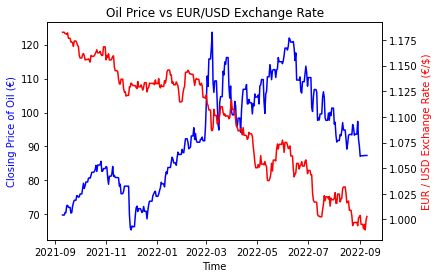

In [241]:
# Plotting 'Close_oil' and 'Close_eur/usd' over time
fig, ax = plt.subplots()
ax.plot(df.index, df['Close_oil'], color='b')
ax2=ax.twinx()
ax2.plot(df.index, df['Close_eur/usd'], color='r')
ax.set_xlabel('Time')
ax.set_ylabel('Closing Price of Oil (€)', color='b')
ax2.set_ylabel('EUR / USD Exchange Rate (€/$)', color='r')
ax.set_title('Oil Price vs EUR/USD Exchange Rate')
plt.show()

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-09-10 to 2022-09-09
Freq: D
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close_oil         365 non-null    float64
 1   % change_oil      365 non-null    float64
 2   Close_eur/usd     365 non-null    float64
 3   % change_eur/usd  365 non-null    float64
dtypes: float64(4)
memory usage: 14.3 KB


                  Close_oil  % change_oil  Close_eur/usd  % change_eur/usd
Close_oil          1.000000      0.056866      -0.603672         -0.035298
% change_oil       0.056866      1.000000       0.075163         -0.055808
Close_eur/usd     -0.603672      0.075163       1.000000          0.054466
% change_eur/usd  -0.035298     -0.055808       0.054466          1.000000


<AxesSubplot:>

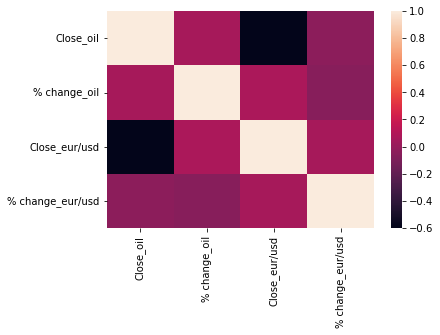

In [243]:
# Correlation matrix & heatmap of df 
corr = df.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [163]:
# New dataframe - data since Russia's invasion of Ukraine
df2 = df[(df.index > '2022-02-24')]

                  Close_oil  % change_oil  Close_eur/usd  % change_eur/usd
Close_oil          1.000000      0.188504       0.472827         -0.007100
% change_oil       0.188504      1.000000       0.086489         -0.053574
Close_eur/usd      0.472827      0.086489       1.000000          0.037756
% change_eur/usd  -0.007100     -0.053574       0.037756          1.000000


<AxesSubplot:>

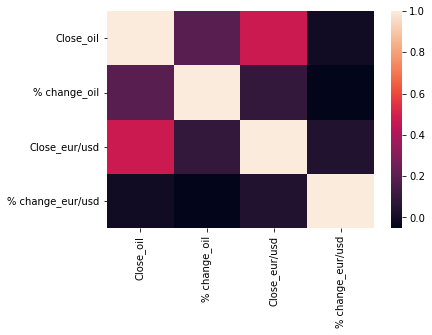

In [164]:
# New correlation matrix & heatmap since Russian invasion - now a positive correlation between 'Close' datapoints
corr2 = df2.corr()
print(corr2)
sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns)

In [165]:
# Reading in stock price data for Exxon Mobil (XOM)
xom = pd.read_csv('/Users/aliempey/Desktop/CIDAF/XOM.csv', parse_dates=['Date'])

In [166]:
xom

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-13,54.650002,55.930000,54.619999,55.369999,52.974079,22052300
1,2021-09-14,55.689999,55.770000,54.410000,54.580002,52.218266,19940300
2,2021-09-15,55.369999,56.529999,55.310001,56.419998,53.978645,23240900
3,2021-09-16,56.459999,56.459999,55.500000,55.820000,53.404606,17907200
4,2021-09-17,55.340000,56.750000,55.099998,55.160000,52.773167,30000400
...,...,...,...,...,...,...,...
246,2022-09-02,96.349998,96.790001,95.110001,95.589996,95.589996,18202600
247,2022-09-06,96.160004,96.589996,94.510002,94.949997,94.949997,19201500
248,2022-09-07,93.190002,94.589996,92.300003,94.139999,94.139999,16274700
249,2022-09-08,94.660004,95.419998,93.720001,94.910004,94.910004,18759200


In [167]:
# Filtering relevant rows using slicing
xom = xom.iloc[:, [0, 4]]

In [168]:
# Adding a % change column
xom['% change'] = xom.loc[:,'Close'].pct_change(1)

/var/folders/lc/dfth25vn32xgp6fwk_kn83b80000gn/T/ipykernel_43814/3224803575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xom['% change'] = xom.loc[:,'Close'].pct_change(1)


In [169]:
# Creating new dataframe with xom data 
df = pd.merge(oil, eurusd, how='outer', on='Date', suffixes=('_oil', '_eur/usd'))
df3 = pd.merge(df, xom, how='outer', on='Date', suffixes=('', '_xom'))
df3.rename(columns = {'Close':'Close_xom', '% change':'% change_xom'}, inplace = True)

In [170]:
df3

,Date,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd,Close_xom,% change_xom
0,2021-09-10,69.82,0.022854,1.182592,NaN,NaN,NaN
1,2021-09-13,70.54,0.010312,1.181195,-0.001181,55.369999,NaN
2,2021-09-14,70.53,-0.000142,1.181195,0.000000,54.580002,-0.014268
3,2021-09-15,72.59,0.029207,1.180498,-0.000590,56.419998,0.033712
4,2021-09-16,72.69,0.001378,1.182000,0.001272,55.820000,-0.010634
...,...,...,...,...,...,...,...
257,2022-04-15,NaN,NaN,1.082099,-0.006936,NaN,NaN
258,2022-09-07,NaN,NaN,0.989795,-0.005454,94.139999,-0.008531
259,2022-09-08,NaN,NaN,0.999570,0.009876,94.910004,0.008179
260,2022-09-09,NaN,NaN,1.001202,0.001633,96.500000,0.016753


In [171]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              262 non-null    datetime64[ns]
 1   Close_oil         248 non-null    float64       
 2   % change_oil      257 non-null    float64       
 3   Close_eur/usd     262 non-null    float64       
 4   % change_eur/usd  261 non-null    float64       
 5   Close_xom         252 non-null    float64       
 6   % change_xom      251 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.4 KB


In [172]:
# Data Cleaning, fill NAs etc
df3['Date'] = pd.to_datetime(df3['Date'])

In [173]:
df3 = df3.set_index('Date')

In [174]:
df3 = df3.resample('D').mean()

In [175]:
colxom = ['Close_xom']
df3.loc[:,colxom] = df3.loc[:,colxom].bfill()

In [176]:
df3=df3.fillna(0)

In [177]:
df3

,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd,Close_xom,% change_xom
Date,,,,,,
2021-09-10,69.82,0.022854,1.182592,0.000000,55.369999,0.000000
2021-09-11,0.00,0.000000,0.000000,0.000000,55.369999,0.000000
2021-09-12,0.00,0.000000,0.000000,0.000000,55.369999,0.000000
2021-09-13,70.54,0.010312,1.181195,-0.001181,55.369999,0.000000
2021-09-14,70.53,-0.000142,1.181195,0.000000,54.580002,-0.014268
...,...,...,...,...,...,...
2022-09-05,0.00,0.000000,0.990943,-0.004311,94.949997,0.000000
2022-09-06,87.35,0.000687,0.995223,0.004319,94.949997,-0.006695
2022-09-07,0.00,0.000000,0.989795,-0.005454,94.139999,-0.008531


                  Close_oil  % change_oil  Close_eur/usd  % change_eur/usd  \
Close_oil          1.000000      0.045088       0.871185         -0.044218   
% change_oil       0.045088      1.000000       0.033416         -0.055808   
Close_eur/usd      0.871185      0.033416       1.000000         -0.060083   
% change_eur/usd  -0.044218     -0.055808      -0.060083          1.000000   
Close_xom          0.174321     -0.016577      -0.056335         -0.006940   
% change_xom       0.074895      0.615712       0.062525         -0.002223   

                  Close_xom  % change_xom  
Close_oil          0.174321      0.074895  
% change_oil      -0.016577      0.615712  
Close_eur/usd     -0.056335      0.062525  
% change_eur/usd  -0.006940     -0.002223  
Close_xom          1.000000      0.028597  
% change_xom       0.028597      1.000000  


<AxesSubplot:>

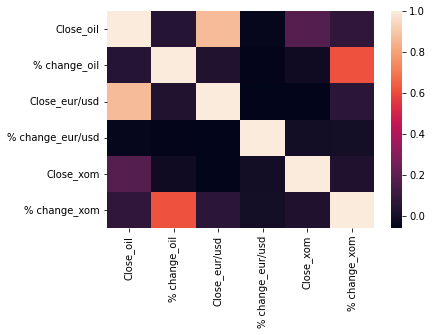

In [178]:
# Correlation matrix & heatmap with XOM data included - XOM pct change and oil price pct change positively correlated
corr3 = df3.corr()
print(corr3)
sns.heatmap(corr3, xticklabels=corr3.columns, yticklabels=corr3.columns)

In [244]:
# Creating reusable 'distplot' function that returns a histogram of the distribution of a column to make this process easier
def distplot(col):
    plot = df3[col].plot.hist(bins=20, title=col)
    return plot

<AxesSubplot:title={'center':'% change_eur/usd'}, ylabel='Frequency'>

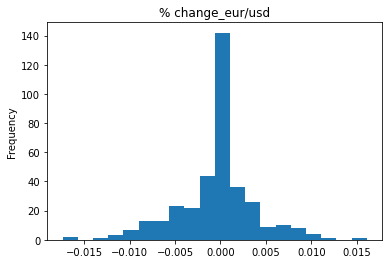

In [251]:
distplot('% change_eur/usd')

<AxesSubplot:title={'center':'% change_oil'}, ylabel='Frequency'>

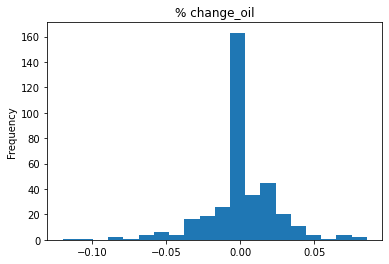

In [246]:
distplot('% change_oil')

In [183]:
# Lambda function to apply a column to the df returning 'Yes' if the daily change in oil is high and 'No' if not - volatility indicator
df3['high_vol_oil'] = df3.apply(lambda x: 'Yes' if (x['% change_oil'] < -0.025 or x['% change_oil'] > 0.025) else 'No', axis=1)
df3

,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd,Close_xom,% change_xom,high_vol_oil
Date,,,,,,,
2021-09-10,69.82,0.022854,1.182592,0.000000,55.369999,0.000000,No
2021-09-11,0.00,0.000000,0.000000,0.000000,55.369999,0.000000,No
2021-09-12,0.00,0.000000,0.000000,0.000000,55.369999,0.000000,No
2021-09-13,70.54,0.010312,1.181195,-0.001181,55.369999,0.000000,No
2021-09-14,70.53,-0.000142,1.181195,0.000000,54.580002,-0.014268,No
...,...,...,...,...,...,...,...
2022-09-05,0.00,0.000000,0.990943,-0.004311,94.949997,0.000000,No
2022-09-06,87.35,0.000687,0.995223,0.004319,94.949997,-0.006695,No
2022-09-07,0.00,0.000000,0.989795,-0.005454,94.139999,-0.008531,No


In [185]:
# Repeating the lambda function for volatility indicator of the exchange rate
df3['high_vol_fx'] = df3.apply(lambda x: 'Yes' if (x['% change_eur/usd'] < -0.005 or x['% change_eur/usd'] > 0.005) else 'No', axis=1)
df3

,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd,Close_xom,% change_xom,high_vol_oil,high_vol_fx
Date,,,,,,,,
2021-09-10,69.82,0.022854,1.182592,0.000000,55.369999,0.000000,No,No
2021-09-11,0.00,0.000000,0.000000,0.000000,55.369999,0.000000,No,No
2021-09-12,0.00,0.000000,0.000000,0.000000,55.369999,0.000000,No,No
2021-09-13,70.54,0.010312,1.181195,-0.001181,55.369999,0.000000,No,No
2021-09-14,70.53,-0.000142,1.181195,0.000000,54.580002,-0.014268,No,No
...,...,...,...,...,...,...,...,...
2022-09-05,0.00,0.000000,0.990943,-0.004311,94.949997,0.000000,No,No
2022-09-06,87.35,0.000687,0.995223,0.004319,94.949997,-0.006695,No,No
2022-09-07,0.00,0.000000,0.989795,-0.005454,94.139999,-0.008531,No,Yes


In [207]:
# Defining a new df returning rows where oil price and the exchange rate were volatile
df_vol = df3[(df3['high_vol_oil'] == 'Yes') & (df3['high_vol_fx'] == 'Yes')]

                  Close_oil  % change_oil  Close_eur/usd  % change_eur/usd  \
Close_oil          1.000000      0.506356      -0.169486         -0.085058   
% change_oil       0.506356      1.000000       0.008400         -0.280203   
Close_eur/usd     -0.169486      0.008400       1.000000          0.194564   
% change_eur/usd  -0.085058     -0.280203       0.194564          1.000000   
Close_xom          0.577501      0.163962      -0.759672         -0.093905   
% change_xom       0.276769      0.695945       0.110272         -0.152536   

                  Close_xom  % change_xom  
Close_oil          0.577501      0.276769  
% change_oil       0.163962      0.695945  
Close_eur/usd     -0.759672      0.110272  
% change_eur/usd  -0.093905     -0.152536  
Close_xom          1.000000      0.015295  
% change_xom       0.015295      1.000000  


<AxesSubplot:>

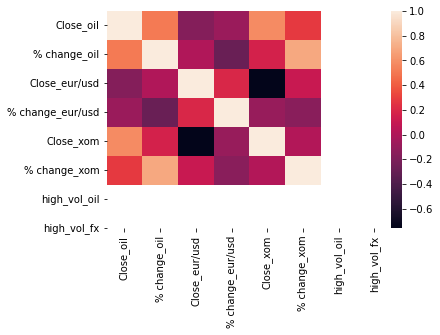

In [208]:
# Correlation matrix and heatmap of the new df
corr_vol = df_vol.corr()
print(corr_vol)
sns.heatmap(corr_vol, xticklabels=df_vol.columns, yticklabels=df_vol.columns)